(ex-item-analyses-notebook)=
# Esercizi 

L'obiettivo di questo tutorial è condurre analisi di affidabilità su un questionario composto da item dicotomici, e imparare come calcolare l'errore standard di misura e gli intervalli di confidenza attorno al punteggio osservato.

In [1]:
source("../_common.R")
library("psych")

## Questionario di Personalità di Eysenck 

Il Questionario di Personalità di Eysenck (EPQ) è un'inventario della personalità progettato per misurare l'Estroversione (E), la Neuroticismo/Ansia (N), la Psicotismo (P), e include una scala di Desiderabilità Sociale (L) (Eysenck e Eysenck, 1976).

L'EPQ include 90 item, ai quali i partecipanti rispondono con "SI" o "NO" (fornendo quindi risposte dicotomiche o binarie). Questo è relativamente insolito per i questionari di personalità, che tipicamente impiegano scale Likert per aumentare la quantità di informazioni da ciascun item individuale, e quindi ridurre il numero totale di item. Al contrario, le scale dell'EPQ sono misurate da molti item, garantendo una buona copertura di tutti i domini coinvolti. L'uso di item binari evita problemi legati ai bias di risposta come la "tendenza centrale" (tendenza a scegliere opzioni di risposta centrali) e la "risposta estrema" (tendenza a scegliere opzioni di risposta estreme).

I dati sono stati raccolti negli Stati Uniti nel 1997 come parte di uno studio interculturale più ampio (Barrett, Petrides, Eysenck & Eysenck, 1998). Si trattava di uno studio di ampia portata, N = 1381 (63.2% donne e 36.8% uomini). La maggior parte dei partecipanti erano giovani, con un'età mediana di 20.5 anni; tuttavia, erano presenti adulti di tutte le età (intervallo 16 - 89 anni).

### Analisi dell'affidabilità della scala Neuroticismo/Ansia (N) dell'EPQ

Il focus della nostra analisi in questo tutorial sarà la scala Neuroticismo/Ansia (N), misurata da 23 item:

N_3 Il tuo umore oscilla spesso?
N_7 Ti senti mai "solo miserabile" senza motivo?
N_12 Ti preoccupi spesso di cose che non avresti dovuto fare o dire?
N_15 Sei una persona irritabile?
N_19 I tuoi sentimenti sono facilmente feriti?
N_23 Ti senti spesso "spossato"?
N_27 Sei spesso tormentato dai sentimenti di colpa?
N_31 Ti definiresti una persona nervosa?
N_34 Sei una persona che si preoccupa molto?
N_38 Ti preoccupi di cose terribili che potrebbero accadere?
N_41 Ti definiresti teso o "nervoso"?
N_47 Ti preoccupi della tua salute?
N_54 Soffri di insonnia?
N_58 Ti sei spesso sentito svogliato e stanco senza motivo?
N_62 Ti sembra spesso che la vita sia molto noiosa?
N_66 Ti preoccupi molto del tuo aspetto?
N_68 Hai mai desiderato di essere morto?
N_72 Ti preoccupi troppo a lungo dopo un'esperienza imbarazzante?
N_75 Soffri di "nervi"?
N_77 Ti senti spesso solo?
N_80 Sei facilmente ferito quando le persone trovano difetti in te o nel lavoro che fai?
N_84 A volte ti senti pieno di energia e altre volte molto fiacco?
N_88 Sei suscettibile su alcune cose?
Si noti che tutti gli item indicano "Neuroticismo" invece che "Stabilità Emotiva" (cioè non ci sono item controindicativi).

### Esame preliminare dei dati

Importiamo i dati in un nuovo data frame chiamato EPQ:

In [2]:
EPQ <- rio::import(file = "../data/data_epq/EPQ_N_demo.txt")
glimpse(EPQ)

Rows: 1,381
Columns: 26
$ id   <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19…
$ age  <int> NA, NA, NA, 40, NA, 40, NA, NA, 40, NA, 22, 29, 44, 35, 46, 26, 3…
$ sex  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ N_3  <int> 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,…
$ N_7  <int> 0, 0, 0, 0, 0, NA, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1…
$ N_12 <int> 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ N_15 <int> 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,…
$ N_19 <int> 1, 1, 1, 1, 1, NA, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ N_23 <int> 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,…
$ N_27 <int> 1, 1, 1, NA, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1…
$ N_31 <int> 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,…
$ N_34 <int> 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,…
$ N_38 <int> 1, 

Ci sono 26 variabili in questo data frame, che iniziano con l'id del partecipante, l'età e il sesso (0 = femmina; 1 = maschio). Queste variabili demografiche sono seguite da 23 risposte agli item, che sono o 0 (per "NO") o 1 (per "SI"). Ci sono anche alcune risposte mancanti, contrassegnate con NA.

In [3]:
describe(EPQ[4:26])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N_3,1,1379,0.6381436,0.4807119,1,0.6723982,0,0,1,1,-0.57432906,-1.6713566,0.012945020
N_7,2,1379,0.5445975,0.4981878,1,0.5556561,0,0,1,1,-0.17890923,-1.9694181,0.013415625
N_12,3,1381,0.7965243,0.4027292,1,0.8705882,0,0,1,1,-1.47150761,0.1654560,0.010837180
N_15,4,1375,0.2887273,0.4533357,0,0.2361490,0,0,1,1,0.93140272,-1.1333116,0.012225556
N_19,5,1377,0.5773420,0.4941615,1,0.5965549,0,0,1,1,-0.31279607,-1.9035394,0.013316862
N_23,6,1377,0.5141612,0.4999810,1,0.5176791,0,0,1,1,-0.05660589,-1.9982453,0.013473689
N_27,7,1377,0.4734931,0.4994783,0,0.4669084,0,0,1,1,0.10606126,-1.9901947,0.013460142
N_31,8,1378,0.3345428,0.4720017,0,0.2934783,0,0,1,1,0.70057849,-1.5102842,0.012715075
N_34,9,1378,0.5994194,0.4901940,1,0.6240942,0,0,1,1,-0.40533871,-1.8370321,0.013205151


Dall'output precedente, possiamo dedurre la difficoltà degli item. La media rappresenta la difficoltà dell'item. In questo set di item, le difficoltà variano ampiamente. L'item più "facile" da accettare è N_88 ("Sei suscettibile su alcune cose?"), con la media più alta (0,89). Poiché i dati sono codificati binari 0/1, la media può essere interpretata come il 89% del campione che ha accettato l'item. L'item più difficile da accettare in questo set è N_62, con il valore medio più basso (0,27). N_62 è formulato come "Ti sembra spesso che la vita sia molto noiosa?", e solo il 27% del campione è stato d'accordo con questo. Questo item indica un grado più elevato di Neuroticismo (forse persino un sintomo di depressione) rispetto all'item N_88, ed è quindi più difficile da accettare.

Ora calcoliamo le correlazioni di momento-prodotto (Pearson) tra gli item dell'EPQ utilizzando la funzione lowerCor() del pacchetto psych. Questa funzione è molto conveniente perché, a differenza della funzione di base cor() di R, mostra solo il triangolo inferiore della matrice delle correlazioni, il che la rende più compatta e più facile da leggere. Se richiami l'aiuto su questa funzione, vedrai che per impostazione predefinita le correlazioni verranno stampate con 2 cifre decimali (digits=2), e i valori mancanti verranno trattati in modo pairwise (use="pairwise").

In [4]:
lowerCor(EPQ[4:26])

     N_3  N_7  N_12 N_15 N_19 N_23 N_27 N_31 N_34 N_38 N_41
N_3  1.00                                                  
N_7  0.36 1.00                                             
N_12 0.26 0.28 1.00                                        
N_15 0.31 0.21 0.12 1.00                                   
N_19 0.33 0.30 0.32 0.18 1.00                              
N_23 0.36 0.30 0.24 0.28 0.28 1.00                         
N_27 0.28 0.28 0.31 0.24 0.32 0.29 1.00                    
N_31 0.24 0.20 0.18 0.22 0.31 0.24 0.26 1.00               
N_34 0.30 0.33 0.34 0.20 0.41 0.32 0.36 0.45 1.00          
N_38 0.26 0.24 0.28 0.21 0.29 0.27 0.33 0.28 0.41 1.00     
N_41 0.23 0.21 0.16 0.29 0.27 0.26 0.23 0.43 0.35 0.27 1.00
N_47 0.17 0.13 0.19 0.09 0.16 0.20 0.20 0.18 0.20 0.29 0.14
N_54 0.20 0.19 0.11 0.20 0.15 0.16 0.15 0.20 0.18 0.16 0.21
N_58 0.36 0.34 0.22 0.19 0.24 0.35 0.24 0.18 0.22 0.20 0.16
N_62 0.26 0.23 0.14 0.23 0.20 0.29 0.20 0.20 0.23 0.19 0.24
N_66 0.20 0.16 0.27 0.12 0.25 0.24 0.22 

Ora calcoliamo le correlazioni tetracoriche per gli stessi item. Queste sarebbero più appropriate per item binari su cui è stata imposta una dicotomia NO/YES (anche se l'entità sottostante dell'accordo è in realtà continua). Le correlazioni tetracoriche sono un tipo di correlazione utilizzato specificamente per variabili dicotomiche (binarie), come quelle presenti nel questionario EPQ dove le risposte sono solo "SI" o "NO". Questo tipo di correlazione è più appropriato per tali item perché tiene conto del fatto che la scala di misura sottostante è teoricamente continua, nonostante le risposte siano state forzate in una dicotomia. La funzione `tetrachoric()` esegue il calcolo di queste correlazioni e gestisce automaticamente i valori mancanti utilizzando la cancellazione pairwise, il che significa che vengono considerati solo i dati disponibili per ciascuna coppia di item nel calcolo della correlazione. La funzione `tetrachoric()` ha per impostazione predefinita la cancellazione pairwise per i valori mancanti.

In [5]:
tetrachoric(EPQ[4:26])

Call: tetrachoric(x = EPQ[4:26])
tetrachoric correlation 
     N_3  N_7  N_12 N_15 N_19 N_23 N_27 N_31 N_34 N_38 N_41
N_3  1.00                                                  
N_7  0.54 1.00                                             
N_12 0.44 0.48 1.00                                        
N_15 0.55 0.35 0.23 1.00                                   
N_19 0.51 0.46 0.53 0.30 1.00                              
N_23 0.55 0.46 0.42 0.46 0.42 1.00                         
N_27 0.44 0.43 0.55 0.38 0.49 0.45 1.00                    
N_31 0.40 0.33 0.35 0.35 0.51 0.38 0.41 1.00               
N_34 0.46 0.50 0.56 0.34 0.61 0.49 0.55 0.72 1.00          
N_38 0.40 0.37 0.48 0.35 0.45 0.42 0.49 0.45 0.60 1.00     
N_41 0.39 0.34 0.31 0.46 0.45 0.42 0.37 0.64 0.58 0.43 1.00
N_47 0.26 0.20 0.33 0.16 0.25 0.31 0.31 0.30 0.31 0.44 0.23
N_54 0.33 0.31 0.22 0.33 0.26 0.27 0.25 0.32 0.31 0.26 0.35
N_58 0.54 0.52 0.38 0.33 0.38 0.55 0.39 0.31 0.35 0.31 0.28
N_62 0.47 0.38 0.30 0.38 0.34 0.48 0.34 0.

Si noti che le correlazioni tetracoriche sono sostanzialmente più elevate rispetto alle correlazioni di Pearson. Questo non è sorprendente dato che i dati sono binari e le correlazioni di Pearson sono state sviluppate per dati continui. Le correlazioni di Pearson sottostimano la forza delle relazioni tra gli item binari.

## Calcolo del punteggio totale della scala 

Possiamo calcolare il punteggio della scala di Neuroticismo (come somma dei punteggi dei suoi item). Si noti che non ci sono item reverse nella scala di Neuroticismo, quindi non c'è bisogno di codificare inversamente alcun item.

In presenza di dati mancanti, sommare i punteggi degli item non è consigliabile perché qualsiasi risposta mancante sarà essenzialmente trattata come zero, il che non è corretto perché non rispondere a una domanda non è la stessa cosa che dire "NO".

Invece, utilizzeremo la funzione di base di R `rowMeans()` per calcolare il punteggio medio dalle risposte agli item non mancanti (rimuovendo i valori "NA" dal calcolo, `na.rm=TRUE`), e quindi moltiplicheremo il risultato per 23 (il numero di item nella scala di Neuroticismo). Questo sostanzialmente sostituirà qualsiasi risposta mancante con la media per quel singolo individuo, producendo quindi una stima equa del punteggio totale.

In [6]:
neuro_score <- rowMeans(EPQ[4:26], na.rm = TRUE) * 23
describe(neuro_score)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,1381,12.14735,5.531146,12,12.17172,5.9304,0,23,23,-0.02607193,-0.8886567,0.1488395


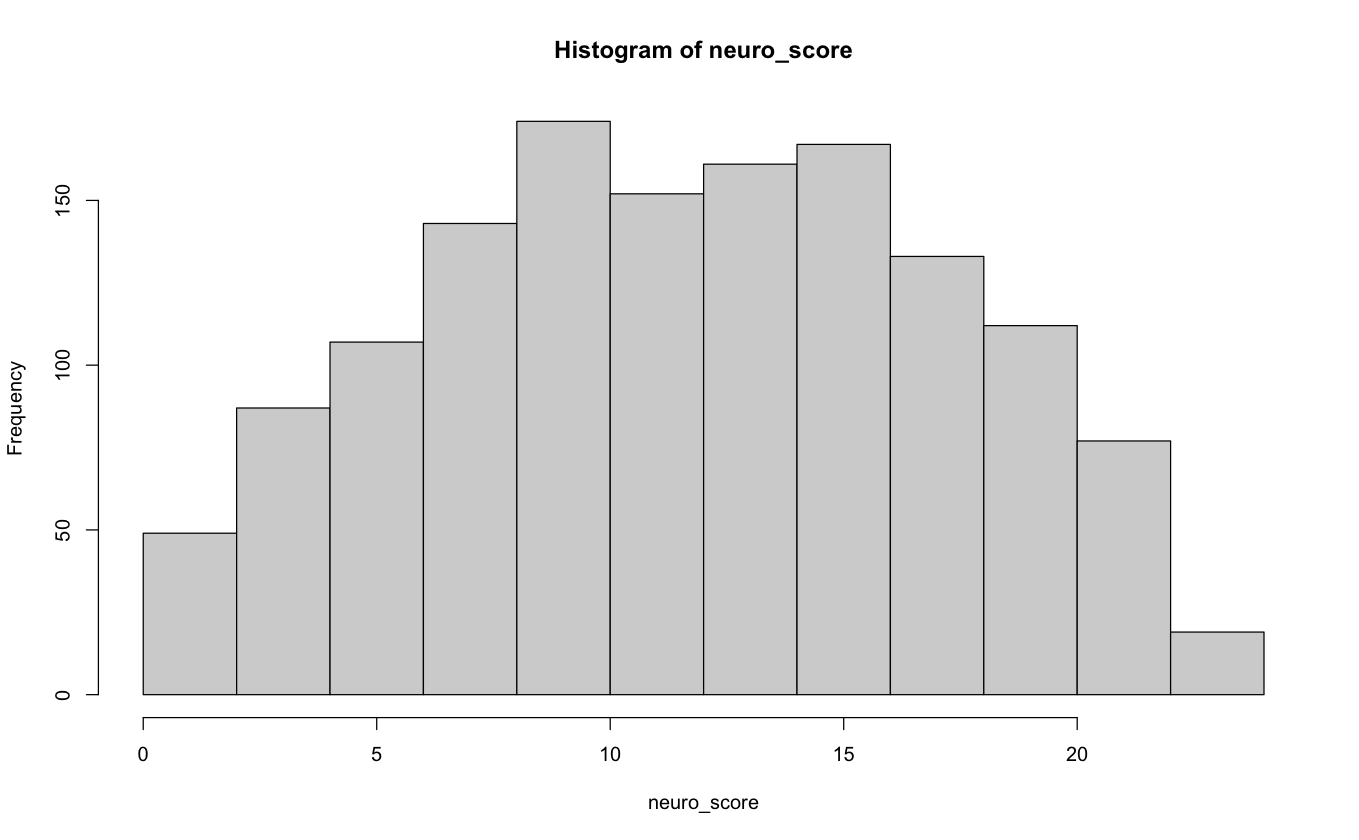

In [7]:
hist(neuro_score)

La distribuzione sembra simmetrica, senza alcun evidente skew. Non ci sono effetti di soffitto o di fondo, quindi la difficoltà del test sembra appropriata per la popolazione.

Ora procediamo a stimare l'affidabilità come consistenza interna (alfa di Cronbach) del punteggio totale. Applichiamo la funzione `alpha()` del pacchetto psych a tutti e 23 gli item del data frame SDQ. 

In [8]:
alpha(EPQ[4:26], cumulative = TRUE)


Reliability analysis   
Call: alpha(x = EPQ[4:26], cumulative = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean  sd median_r
      0.87      0.87    0.88      0.22 6.7 0.0049   12 5.5     0.22

    95% confidence boundaries 
         lower alpha upper
Feldt     0.86  0.87  0.88
Duhachek  0.86  0.87  0.88

 Reliability if an item is dropped:
     raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
N_3       0.86      0.86    0.87      0.22 6.2   0.0052 0.0075  0.21
N_7       0.86      0.86    0.87      0.22 6.3   0.0052 0.0075  0.21
N_12      0.87      0.86    0.87      0.22 6.4   0.0051 0.0075  0.22
N_15      0.87      0.87    0.87      0.23 6.5   0.0050 0.0074  0.22
N_19      0.86      0.86    0.87      0.22 6.2   0.0053 0.0067  0.21
N_23      0.86      0.86    0.87      0.22 6.2   0.0052 0.0075  0.21
N_27      0.86      0.86    0.87      0.22 6.3   0.0052 0.0075  0.21
N_31      0.86      0.86    0.87      0.22 6.3   0.0052 0.0068  0.22
N_34      0.86      

Per questi dati, $\alpha$ = 0.87. 

Una statistica riassuntiva importante è average_r, che rappresenta la correlazione media tra gli item. Altre utili statistiche riassuntive sono la media (mean) e la deviazione standard (sd), che sono rispettivamente la media e la deviazione standard del punteggio del test.